# Diabetes dataset


## Step 1: Prepare Project


In [9]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.datasets import load_diabetes

## Step 2: Define Problem
What is your task? What are your goals? What do you want to achieve?

The dataset provide us medical information for patients refgarding diabetes. We can analyse the data and get some useful insights train an algorithm based on these data to predict patients disease progression one year after baseline. 

In [10]:
diabetes = load_diabetes()
df1 = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names) # convert breast cancer data to Dataframe
df1["target"]=diabetes.target

In [11]:
print(f'The shape of the dataset is: {df1.shape}')

The shape of the dataset is: (442, 11)


#### Data description 

In [10]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

In [5]:
df1.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


## Step 3: Exploratory  Data Analysis - EDA


In [6]:
df1.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

All the data are numeric 

##### Descriptive Statistics per feature 

In [7]:
df1.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


From the figures we can conlude that the data do not need scaling.(Seems to be scaled around zero - standardization). There is no need to standardize the target.

#### Print descriptive statistics in a more interpretable way 

In [8]:
df1.describe().T.style.bar(
    subset=["mean"], color="#205ff2"
).background_gradient(subset=["std"], cmap="Reds").background_gradient(
    subset=["50%"], cmap="coolwarm"
)

,count,mean,std,min,25%,50%,75%,max
age,442.000000,-0.000000,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.000000,0.000000,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.000000,-0.000000,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.000000,0.000000,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.000000,-0.000000,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.000000,0.000000,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.000000,-0.000000,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.000000,0.000000,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.000000,-0.000000,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.000000,-0.000000,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


#### Plot the histographs and density plots for every attribute of the dataset 

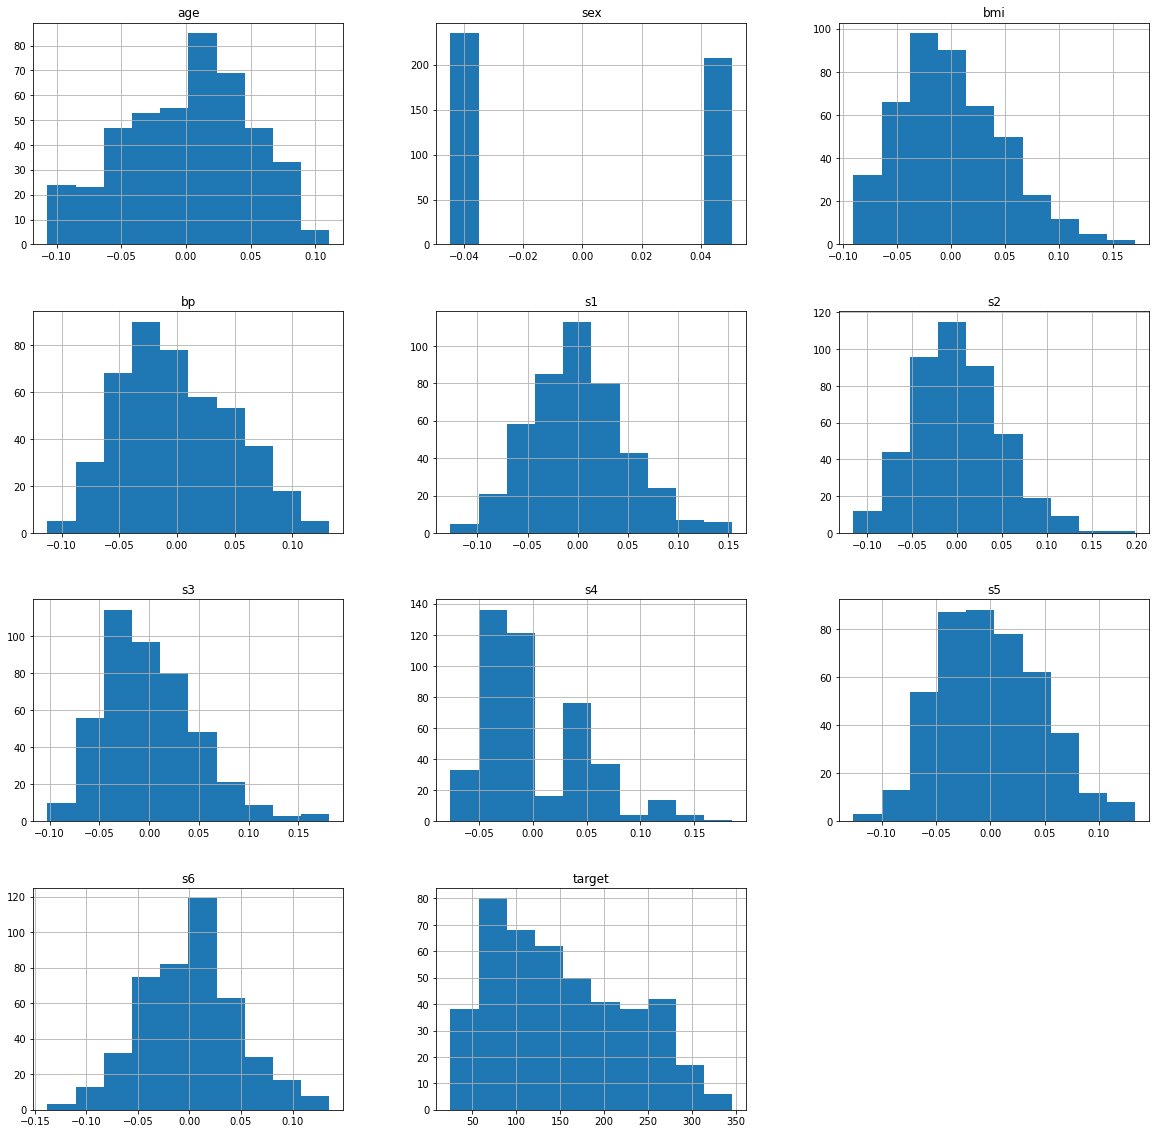

In [9]:
plt.rcParams["figure.figsize"] = (20,20)
df1.hist()
plt.show()

The features are scaled as depicted in the above histograms

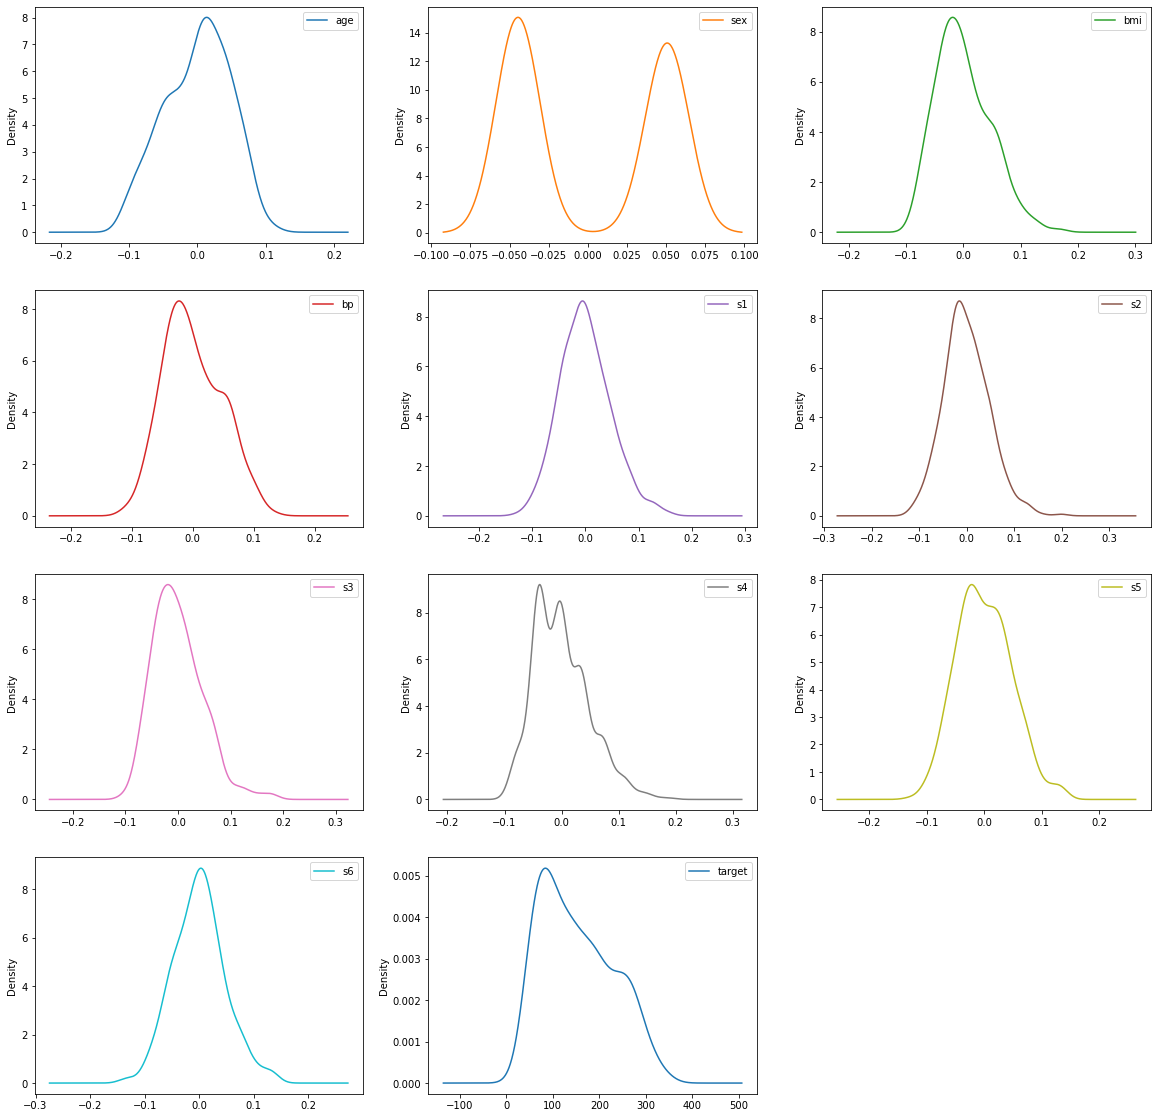

In [10]:
df1.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

The features data seems to be fairly symmetrical. It makes sense since they are standardized.

##### Searching for missing values 

In [11]:
df1.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [12]:
df1.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

From the figures above we can see that there are not any null/na values in the dataset 

#### Searching for duplicates in the dataset  

In [10]:
duplicate_values = df1[df1.duplicated()]

In [11]:
duplicate_values

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target


There are not any duplicated values in the dataset 

#### Searching for outliers 

There are various ways of finding the outliers: 

* Using scatter plots
* Using Boxplots
* Using z-score (3σ)
* Using the IQR interquartile range 

In [13]:
# For removing outliers we can use the following steps 

Q1, Q3 = np.percentile(df1,[25,75]) # In case we need to remove outliers 
IQR = Q3 - Q1
lower_bound = Q1 - (1.5* IQR)   ## The bounds to slice the dataframe
upper_bound = Q3 + (1.5* IQR)   ## Thus we keep values inside the bounds and we assume that everything outside is an outlier and remove it

###### Boxplots 

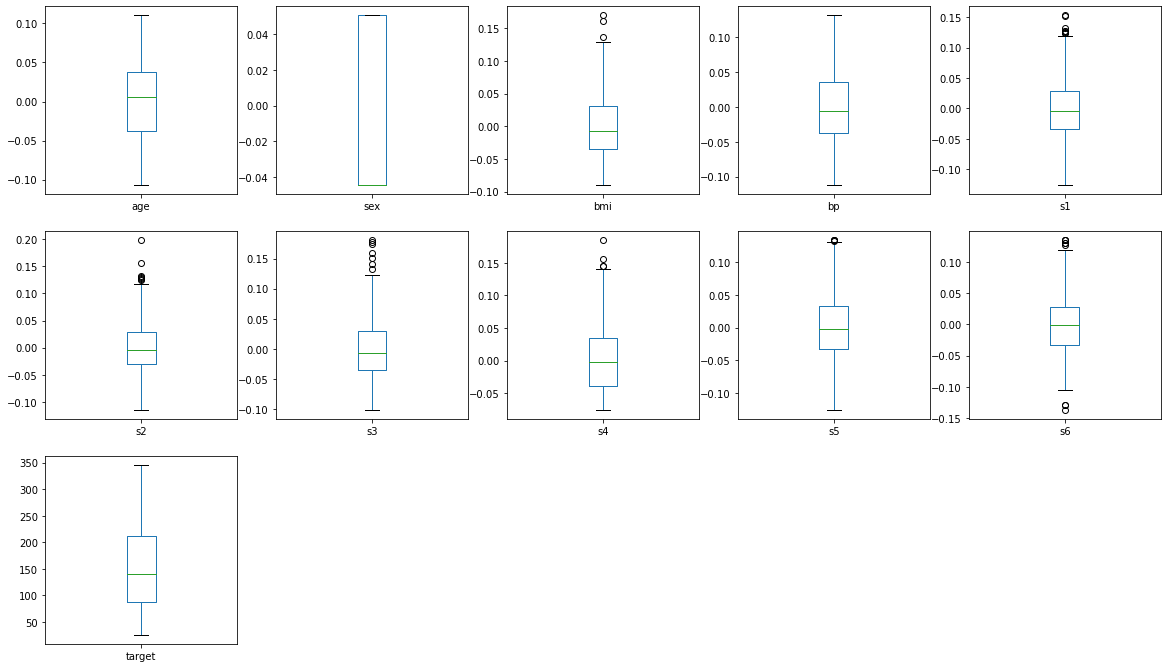

In [12]:
df1.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
plt.show()

<AxesSubplot:>

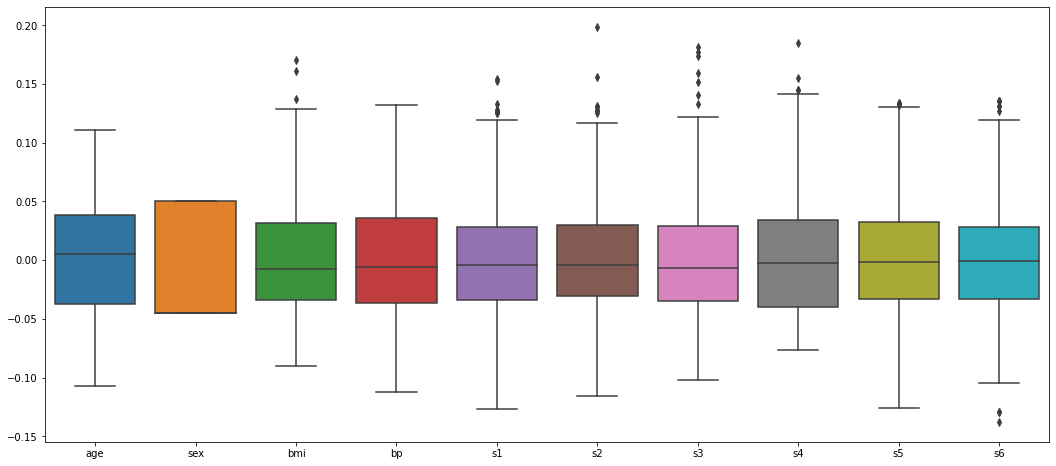

In [16]:
f = plt.figure(figsize=(18,8))
sns.boxplot(data=df1.loc[:,"age":'s6'])

<AxesSubplot:>

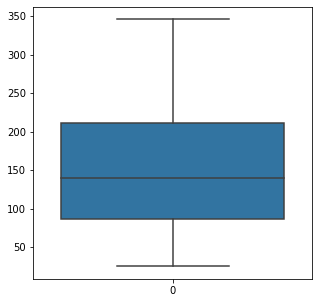

In [17]:
f = plt.figure(figsize=(5,5))
sns.boxplot(data=df1.loc[:,"target"])

From the boxplot someone can infer that outliers wont be a problem for the dataset and since we do not have the expert judgment for medical data which might hold important information we decide proceed without any alterations in the initial data. 

#### Correlation matrices 

In [13]:
corrM = df1.corr()

In [14]:
corrM

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


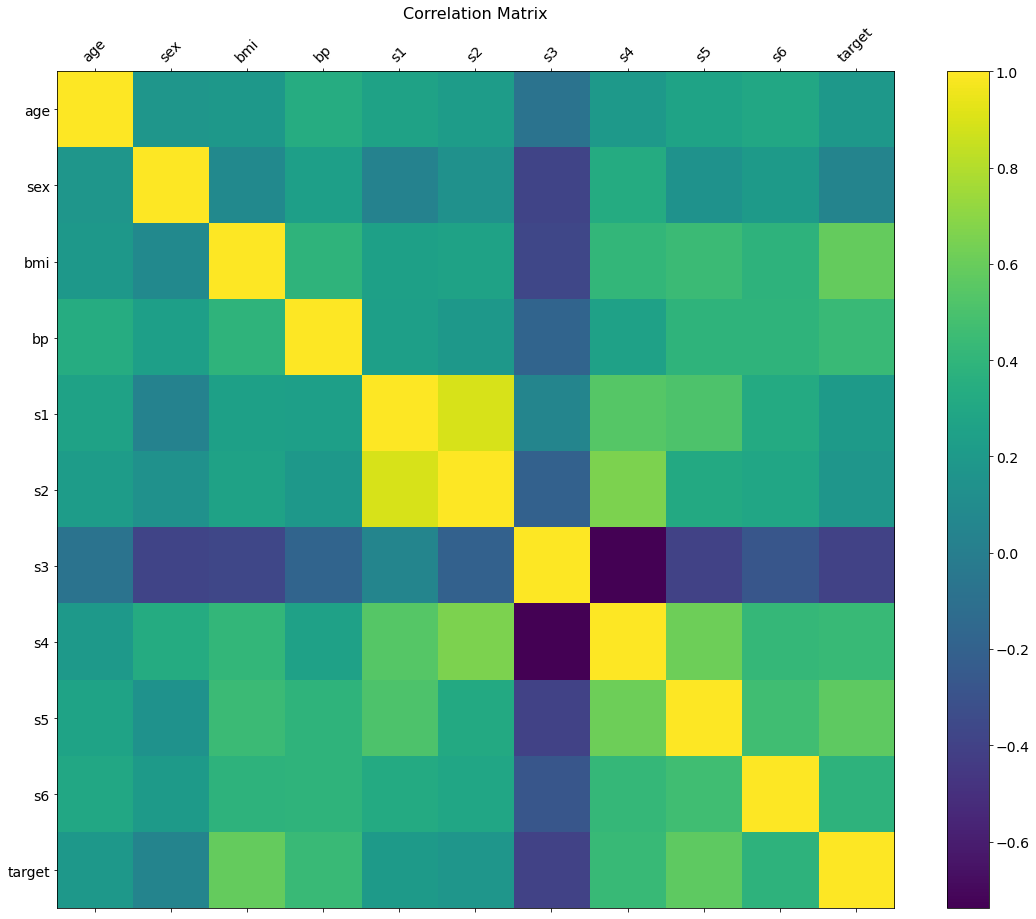

In [20]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corrM, fignum=f.number)
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=14,rotation=45)
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Values above 0,5 and below -0,5 indicate high correlation. 

In [26]:
a = corrM[(corrM['target']< - 0.5) | (corrM['target'] > 0.5)]['target'].index.to_list()


In [28]:
a # Features with high correlation 

['bmi', 's5', 'target']

##### Linear Correlation test - Pearson 

In [3]:
correlation = df1.corr(method='pearson')
columns = correlation.nlargest(10,'target').index
columns

Index(['target', 'bmi', 's5', 'bp', 's4', 's6', 's1', 'age', 's2', 'sex'], dtype='object')

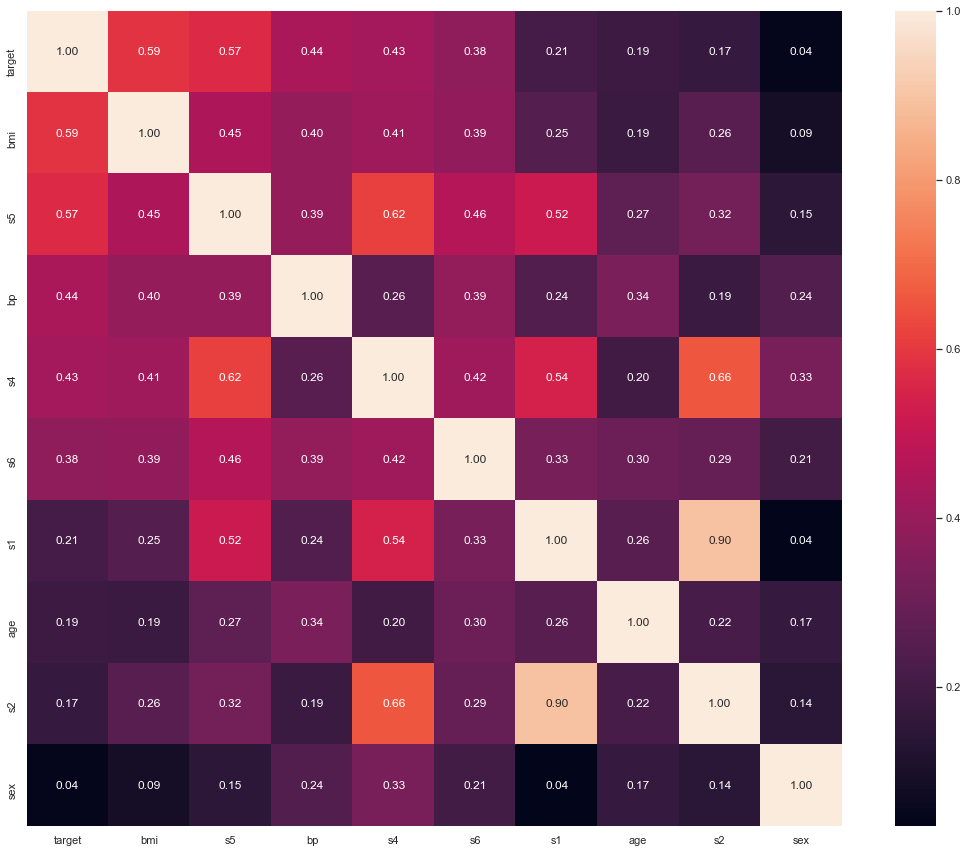

In [7]:
f = plt.figure(figsize=(19, 15))
correlation_map = np.corrcoef(df1[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

##### Monotonic Correlation test - Spearman 

In [8]:
correlation = df1.corr(method='spearman')
columns = correlation.nlargest(10,'target').index
columns

Index(['target', 's5', 'bmi', 's4', 'bp', 's6', 's1', 'age', 's2', 'sex'], dtype='object')

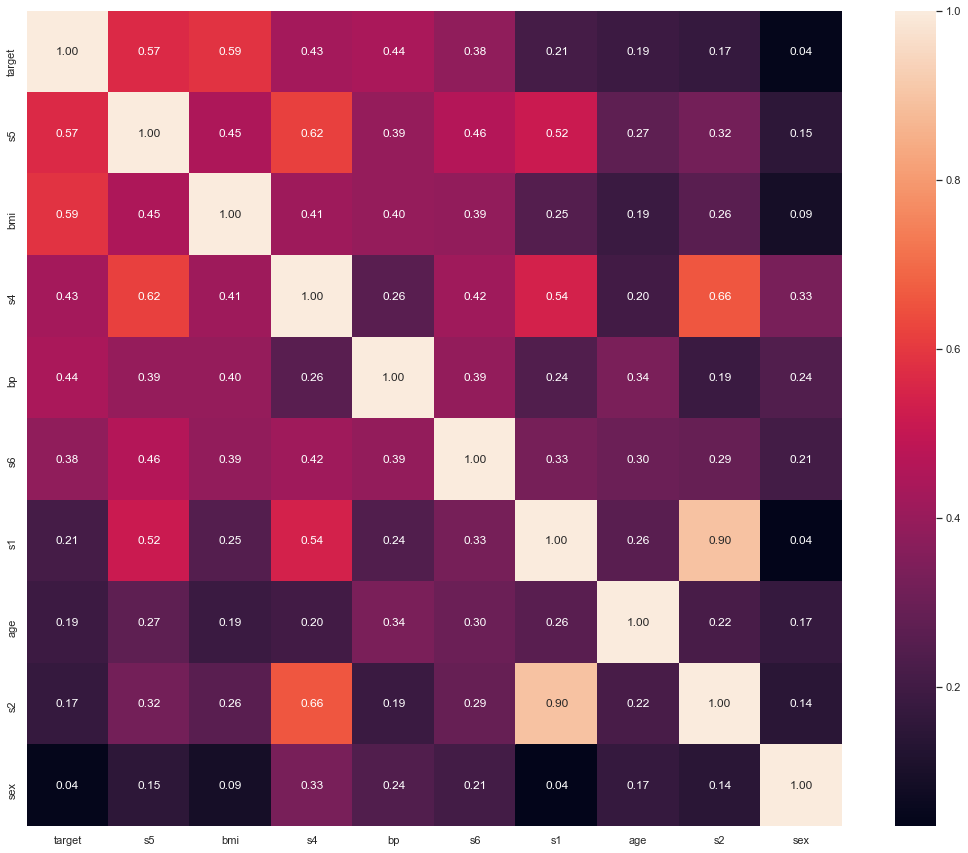

In [9]:
f = plt.figure(figsize=(19, 15))
correlation_map = np.corrcoef(df1[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

Correlation measures the relationship between two quantitative variables. We performed two tests for correlation the pearson and spearman.<br />

<font size="3">**Pearson Correlation**</font> <br />
 The measure can vary between **-1** and **1**, where **-1** means total negative correlation while **1** means total positive correlation. Pearson correlation identifies linear relationship. It has to be mentioned that it assumes Gaussian distribution in the variables. 
 
 
<font size="3">**Spearman Correlation**</font> <br />
 The measure can vary between **-1** and **1**, where **-1** means total negative correlation while **1** means total positive correlation. Pearson correlation identifies both linear and non-linear relationships.


From the correlation tests we can conclude from both tests that the target is correlated with features **bmi** and **s5**.

Additionally with correlation test we can derive relationships among the features. If we take into consideration correlated features in the model we will face the problem of multicollinearity. Two highly correlated features, will cause redundant information (noise) concernig the target. From the above tests we can infer the existence of correralation between the following sets of features: 
* {S1,S4}
* {S1,S5}
* {S1,S2}
* {S2,S4}
* {S4,S5}

##### Scatter plotts 

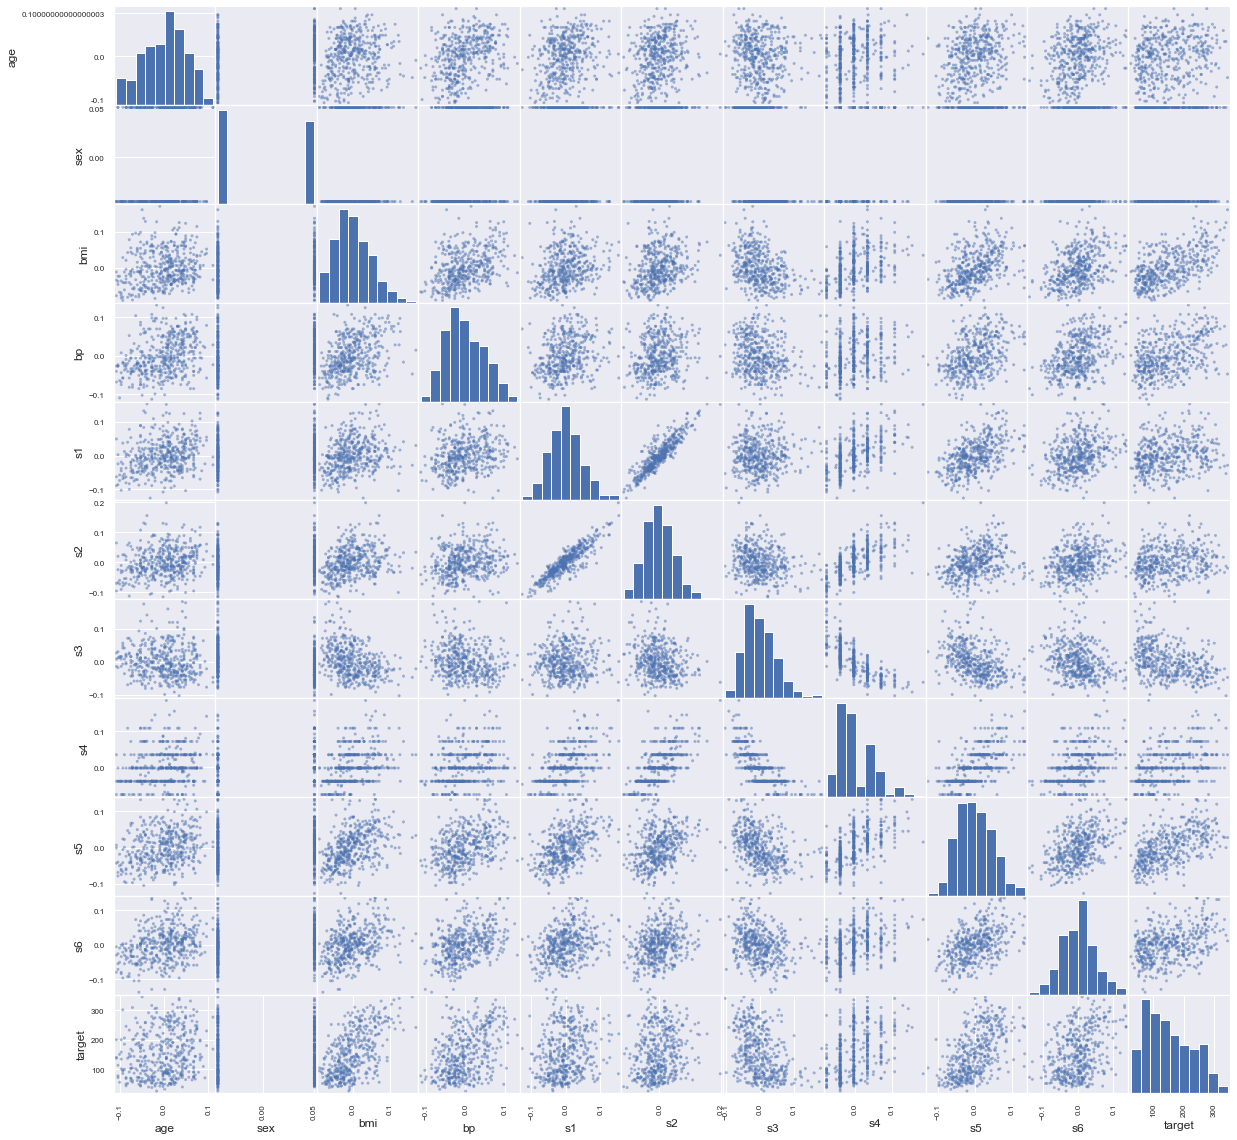

In [32]:
from pandas.plotting import scatter_matrix
scatter_matrix(df1)
plt.show()

From the scatter plots we can infer that for target that possible linearity appears for bmi and s5. Additionaly, s1 and s2 appear to have linear correlation. This is validated by the correlation test which showed a value of 0,9. 

The use of both s1 and s2 features might lead to multicollinearity.

##### Checking for skewness 

In [33]:
df1.skew()

age      -0.231382
sex       0.127385
bmi       0.598148
bp        0.290664
s1        0.378108
s2        0.436592
s3        0.799255
s4        0.735374
s5        0.291774
s6        0.207917
target    0.440563
dtype: float64

* If the skewness is between **-0.5 and 0.5**, the data are fairly **symmetrical**

* If the skewness is between **-1 and — 0.5** or between **0.5 and 1**, the data are **moderately skewed**
* If the skewness is less than **-1 or greater than 1**, the data are **highly skewed**

##### Checking for kyrtosis  

In [34]:
df1.kurtosis()

age      -0.671224
sex      -1.992811
bmi       0.095094
bp       -0.532780
s1        0.232948
s2        0.601381
s3        0.981507
s4        0.444402
s5       -0.134366
s6        0.236917
target   -0.883057
dtype: float64

* If the distribution is tall and thin it is called a leptokurtic distribution (**Kurtosis > 3**). Values in a **leptokurtic** distribution are near the mean or at the extremes.
* A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called **platykurtic** (**Kurtosis <3**) distribution.
* A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic (__Kurtosis=3__) distribution. A __mesokurtic__ distribution looks more close to a normal distribution.

**High kurtosis in a data set is an indicator that data has heavy outliers.**


**Low kurtosis in a data set is an indicator that data has lack of outliers.**


## Step 5: Feature Engineering
Feature selection/feature engineering (as in new features)/data transformations.

### Univariate Feature Selection

In [14]:
# import the necessary libraries from sklearn to perform feature selection  

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot

##### Seperate dataset into features and output 

In [15]:
values = df1.values

X = values[:,0:10]
Y = values[:,10]

#### Using f_regression for feature selection 

age 12.66794232698803
sex 0.5485083826809801
bmi 196.22531532559069
bp 75.12919414009401
s1 12.98866243331662
s2 7.603848472654659
s3 58.12056933670695
s4 70.47698421088384
s5 143.9467846207117
s6 50.64263595433896


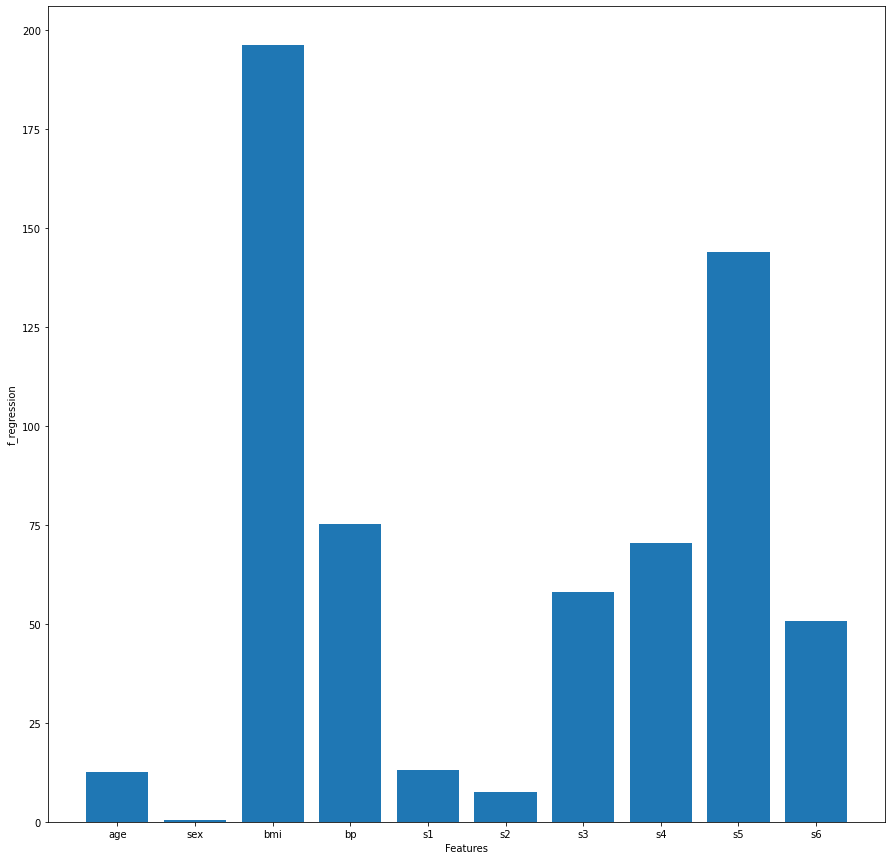

In [16]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

# feature selection using f_regression 
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print(df1.columns[i],(fs.scores_[i]))
    
# plot the scores
f = plt.figure(figsize=(15, 15))
pyplot.bar(df1.columns[:-1], fs.scores_)
plt.xticks([i for i in range(10)])
plt.xlabel('Features')
plt.ylabel('f_regression')
pyplot.show()

As it was expected we take the same results with the correlation test. As a result the most informative features are bmi and S5.

#### Using Mutual information for feature selection 

age 0.0
sex 0.005975804130234463
bmi 0.28611932851820754
bp 0.09380199277423884
s1 0.03365473093192284
s2 0.021159795469307685
s3 0.10261684382826264
s4 0.13235554346923362
s5 0.17972927685194673
s6 0.09168993478759102


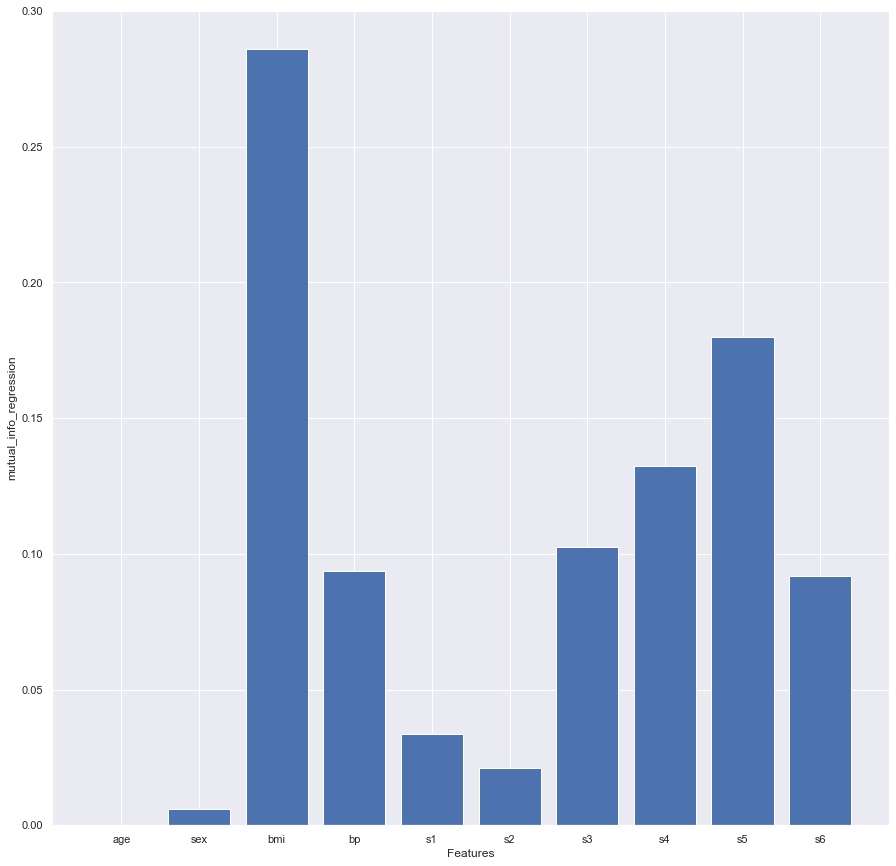

In [58]:
# feature selection using mutual information
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print(df1.columns[i],(fs.scores_[i]))
    
# plot the scores
f = plt.figure(figsize=(15, 15))
pyplot.bar(df1.columns[:-1], fs.scores_)
plt.xticks([i for i in range(10)])
plt.xlabel('Features')
plt.ylabel('mutual_info_regression')
pyplot.show()

Similar results using mutual information 

### Recursive Feature Elimination

In [78]:
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

for i in [i+1 for i in range(10)]:

        # create pipeline
        rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
        model = DecisionTreeRegressor()
        pipeline = Pipeline(steps=[('s',rfe),('m',model)])

        # evaluate model
        cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
        n_scores = cross_val_score(pipeline, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

        # report performance
        print('MAE: %.3f (%.3f) for selected %.1f features' % (mean(n_scores), std(n_scores), i))


MAE: -65.508 (7.657) for selected 1.0 features
MAE: -63.088 (7.204) for selected 2.0 features
MAE: -64.324 (8.173) for selected 3.0 features
MAE: -65.151 (7.183) for selected 4.0 features
MAE: -62.778 (7.276) for selected 5.0 features
MAE: -64.724 (8.053) for selected 6.0 features
MAE: -62.609 (7.933) for selected 7.0 features
MAE: -62.706 (6.203) for selected 8.0 features
MAE: -62.931 (7.782) for selected 9.0 features
MAE: -62.272 (7.864) for selected 10.0 features


The results indicate that the use of all features will give us the best result.

### Feature importance 

In [79]:
# Feature Importance with Extra Trees Regressor 
from sklearn.ensemble import ExtraTreesRegressor

# feature extraction
model = ExtraTreesRegressor(n_estimators=100)
model.fit(X, Y)
print(model.feature_importances_)

[0.05903996 0.03231035 0.25107432 0.10279709 0.04618214 0.05225662
 0.06850651 0.07923043 0.23538227 0.07322032]


In [82]:
names = df1.columns[:-1]

In [86]:
for i,j in zip(names, model.feature_importances_):
    print("Feature: "+i+" importance: ",j)

Feature: age importance:  0.059039957177260134
Feature: sex importance:  0.032310346975490414
Feature: bmi importance:  0.25107432293699683
Feature: bp importance:  0.10279709326241752
Feature: s1 importance:  0.04618213621946728
Feature: s2 importance:  0.05225662478958204
Feature: s3 importance:  0.06850650571300103
Feature: s4 importance:  0.07923042855789177
Feature: s5 importance:  0.23538226663110504
Feature: s6 importance:  0.07322031773678785


Once more we get the same results and thus the most important features are bmi and s5.

##### Feature Scaling 

The data are scaled and thus there is no need to apply anything more regarding scaling.

#### Apply PCA 

The application of PCA is chosen in order to reduce dimensionality and colinearity  

In [95]:
from sklearn.decomposition import PCA

pca10 = PCA(n_components=10)
pca3 = PCA(n_components=3)
pca2 = PCA(n_components=2)

Xt = pca10.fit_transform(X) # All principal components 
Xt3 = pca3.fit_transform(X) # The first 3 principal components with higher variance 
Xt2 = pca2.fit_transform(X) # The first 2 principal components with higher variance


print(pca10.explained_variance_ratio_ )
print(pca3.explained_variance_ratio_ )
print(pca2.explained_variance_ratio_ )

[0.40242142 0.14923182 0.12059623 0.09554764 0.06621856 0.06027192
 0.05365605 0.04336832 0.00783199 0.00085605]
[0.40242142 0.14923182 0.12059623]
[0.40242142 0.14923182]


In [96]:
# Try only highly correlated / important features

Xc = df1.loc[:,["bmi",'s5']].values


## Step 6: Algorithm Selection
Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR # SVM
from sklearn.neural_network import MLPRegressor # ANN
from sklearn.linear_model import LarsCV 
from sklearn.metrics import mean_squared_error, r2_score # More than one metrics to check the robustness


# Try with all pca components 

models = []
models.append(('LR',  LinearRegression()))
models.append(('Lasso', Lasso())) # Lasso incorporates L1 regularization 
models.append(('Ridge', Ridge())) # Ridge incorporates L2 regularization 
models.append(('ENet',  ElasticNet())) # L3 regularization 
models.append(('KNR',  KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('MLP', MLPRegressor(hidden_layer_sizes=11, activation='relu', solver='adam', alpha=0.0001, batch_size = 5,max_iter=700)))
models.append(('LARS', LarsCV(cv=5, normalize=False)))

cv = KFold(n_splits=10)
scoring = "neg_mean_absolute_error"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, Xt, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))


 LR: -44.223011 (+/- 5.744628)
Lasso: -53.081146 (+/- 5.614113)
Ridge: -48.466589 (+/- 5.265546)
ENet: -65.614982 (+/- 7.539244)
KNR: -48.126646 (+/- 4.271989)
 DT: -64.247879 (+/- 7.816213)
SVR: -58.153486 (+/- 6.859943)
MLP: -44.149211 (+/- 5.478276)
LARS: -44.758186 (+/- 5.004674)


In [98]:
# try without pca with all features 

models = []
models.append(('LR',  LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('ENet',  ElasticNet()))
models.append(('KNR',  KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('MLP', MLPRegressor(hidden_layer_sizes=11, activation='relu', solver='adam', alpha=0.0001, batch_size = 5,max_iter=700))) ## Needs tuning it won't work
models.append(('LARS', LarsCV(cv=5, normalize=False)))


cv = KFold(n_splits=10)
scoring = "neg_mean_absolute_error"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))

 LR: -44.223011 (+/- 5.744628)
Lasso: -52.887762 (+/- 4.957333)
Ridge: -48.466589 (+/- 5.265546)
ENet: -65.672001 (+/- 7.551271)
KNR: -48.126646 (+/- 4.271989)
 DT: -62.841162 (+/- 6.421562)
SVR: -58.153742 (+/- 6.859791)
MLP: -44.251081 (+/- 5.150202)
LARS: -44.776017 (+/- 5.820994)


In [99]:
# try only selected features from feature selection 

models = []
models.append(('LR',  LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('ENet',  ElasticNet()))
models.append(('KNR',  KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('MLP', MLPRegressor(hidden_layer_sizes=11, activation='relu', solver='adam', alpha=0.0001, batch_size = 5,max_iter=700))) ## Needs tuning it won't work
models.append(('LARS', LarsCV(cv=5, normalize=False)))


cv = KFold(n_splits=10)
scoring = "neg_mean_absolute_error"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, Xc, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))

 LR: -47.022800 (+/- 5.116923)
Lasso: -52.924358 (+/- 4.941288)
Ridge: -51.962580 (+/- 4.686682)
ENet: -65.806282 (+/- 7.562408)
KNR: -48.778960 (+/- 6.698296)
 DT: -64.516641 (+/- 7.974457)
SVR: -54.113303 (+/- 5.759789)
MLP: -47.033172 (+/- 5.059820)
LARS: -47.022800 (+/- 5.116923)


In [100]:
# try only 3 first fprincipal components 

models = []
models.append(('LR',  LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('ENet',  ElasticNet()))
models.append(('KNR',  KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('MLP', MLPRegressor(hidden_layer_sizes=11, activation='relu', solver='adam', alpha=0.0001, batch_size = 5,max_iter=700))) ## Needs tuning it won't work
models.append(('LARS', LarsCV(cv=5, normalize=False)))


cv = KFold(n_splits=10)
scoring = "neg_mean_absolute_error"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, Xt3, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))

 LR: -50.856890 (+/- 4.868491)
Lasso: -55.047584 (+/- 5.723572)
Ridge: -52.725527 (+/- 5.547559)
ENet: -65.635846 (+/- 7.542369)
KNR: -52.407596 (+/- 4.742495)
 DT: -67.265657 (+/- 5.556955)
SVR: -57.521560 (+/- 6.592090)
MLP: -50.914306 (+/- 4.895454)
LARS: -50.856890 (+/- 4.868491)


In [101]:
# try only 2 first principal components 

models = []
models.append(('LR',  LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('ENet',  ElasticNet()))
models.append(('KNR',  KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('MLP', MLPRegressor(hidden_layer_sizes=11, activation='relu', solver='adam', alpha=0.0001, batch_size = 5,max_iter=700))) ## Needs tuning it won't work
models.append(('LARS', LarsCV(cv=5, normalize=False)))


cv = KFold(n_splits=10)
scoring = "neg_mean_absolute_error"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, Xt2, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))

 LR: -51.939514 (+/- 4.857178)
Lasso: -55.047584 (+/- 5.723572)
Ridge: -53.411091 (+/- 5.619489)
ENet: -65.637977 (+/- 7.542086)
KNR: -53.984444 (+/- 4.146987)
 DT: -70.104545 (+/- 8.490908)
SVR: -57.677577 (+/- 6.195067)
MLP: -51.971542 (+/- 4.871026)
LARS: -51.939514 (+/- 4.857178)


We can conclude that even though there might be colinearity in the data the best feature combination is to keep all the features in the model, as indicated from recursive feature elimination. PCA application gives similar results without a clear enhancement.

We will proceed with the application of PCA and taking into consideration all the principal components since with this combination the models performed slightly better.

## Step 7: Model Training
Apply ensembles and improve performance by hyperparameter optimisation.

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb

# try with pca all components 

models = []
models.append(('RF',  RandomForestRegressor()))
models.append(('GB',  GradientBoostingRegressor()))
models.append(('ABR',  AdaBoostRegressor()))
models.append(('BR',  BaggingRegressor()))
models.append(('XGB', xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)))

scoring = "neg_mean_absolute_error"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, Xt, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))

 RF: -45.390194 (+/- 4.348548)
 GB: -46.138860 (+/- 4.723400)
ABR: -47.652916 (+/- 5.272912)
 BR: -45.477995 (+/- 5.573539)
XGB: -44.888767 (+/- 5.991563)


##### Remarks on model selection 

It seems that ensembles does not enhance the models capacity.

However, we will proceed with the **XGB and MLP** models for hyperparemater tuning, taking into consideration all the features after the application of PCA algorithm. 

## Step 8: Finalise Model
Predictions on validation set, create model from the entire (training) dataset.

### XGB

In [47]:
# Hyperparameter tuning for XGB 

import xgboost as xgb
from sklearn.model_selection import GridSearchCV


XGB = xgb.XGBRegressor()

param_grid = {"n_estimators": [1000],
              "max_depth": [7, 10],
              "eta": [0.001, 0.01],
              "subsample": [0.6, 0.7],
              "colsample_bytree": [0.8, 0.9]
              }


grid_search = GridSearchCV(XGB, param_grid=param_grid, scoring = 'neg_mean_absolute_error' ,cv=10, n_jobs=-1)
grid_search.fit(Xt, Y)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,


In [48]:
print(grid_search.best_score_)
print(grid_search.best_estimator_)

-44.88578375305792
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             eta=0.01, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.00999999978,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [21]:
## XGB final results 

import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xt, Y, test_size=0.2, random_state=0)

XGB = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             eta=0.01, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.00999999978,
             max_delta_step=0, max_depth=7, min_child_weight=1,
             monotone_constraints='()', n_estimators=1000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)

# Metrics 
r2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

print(f"r2 equals {r2} \n MAE equals {MAE} \n MSE equals {MSE}")

r2 equals 0.32504149282292916 
 MAE equals 44.97250473365355 
 MSE equals 3461.137972687223


In [18]:
# training set performance 

y_predtrain = XGB.predict(X_train)

# Metrics 
r2 = r2_score(y_train,y_predtrain)
MAE = mean_absolute_error(y_train,y_predtrain)
MSE = mean_squared_error(y_train,y_predtrain)

print(f"r2 equals {r2} \n MAE equals {MAE} \n MSE equals {MSE}")

r2 equals 0.9976650571518846 
 MAE equals 2.8256306850876416 
 MSE equals 14.314828604302042


XGB: -44.885784 (+/- 5.440389)


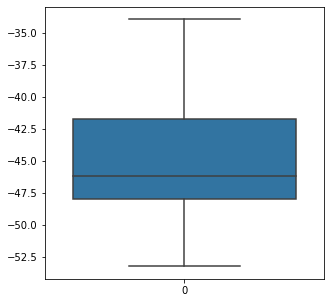

In [26]:
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             eta=0.01, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.00999999978,
             max_delta_step=0, max_depth=7, min_child_weight=1,
             monotone_constraints='()', n_estimators=1000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)


cv_results = cross_val_score(model, Xt, Y, cv=cv, n_jobs=-1, scoring='neg_mean_absolute_error')

f = plt.figure(figsize=(5,5))
sns.boxplot(data=cv_results)

print("%03s: %f (+/- %f)" % ("XGB", cv_results.mean(), cv_results.std()))

From the results we can conclude that the XGB model overfits since the R2 in training set is 0.99 and in test set 0.32. As a result we have low bias and high variance, thus the model fails to generilize.

We could handle overfitting with the following techniques: 
    
* Adding more data
* Data augmentation
* Regularization (L1,L2,L3)
* Removing features from data

We have tried all the above except adding more data and data augmentation, which is not possible.

In [34]:
# Try to regularize the model by adding early stopping_rounds 

# The first way is to directly control model complexity.

#This includes max_depth, min_child_weight and gamma.

#The second way is to add randomness to make training robust to noise.

#This includes subsample and colsample_bytree.

#We can also reduce stepsize eta. Remember to increase num_round when you do so.

import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

XGB = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.01, gamma=2, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.001,
             max_delta_step=0, max_depth=8, min_child_weight=0.5,
             monotone_constraints='()', n_estimators=1000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)



param_grid = {"stopping_rounds": [5, 10, 15],
              "colsample_bytree": [0.6, 0.7],
              "gamma": [1, 2],
              "max_depth": [1, 2,4,8],
              "colsample_bytree": [0.8, 0.9]
              }


grid_search = GridSearchCV(XGB, param_grid=param_grid, scoring = 'neg_mean_absolute_error' ,cv=10, n_jobs=-1)
grid_search.fit(Xt, Y)



print(grid_search.best_score_)
print(grid_search.best_estimator_)

[22:55:41] WARNING: ..\src\learner.cc:576: 
Parameters: { "stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


-64.82607851895419
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             eta=0.01, gamma=1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.001, max_delta_step=0,
             max_depth=2, min_child_weight=0.5, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, stopping_rounds=5, subsample=0.6,
             tree_method='ex

### MLP 

In [119]:
# MLP regressor hyperparameter tuning 

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor # ANN 

MLP = MLPRegressor()


param_grid = {"hidden_layer_sizes": [10,12,14],
              "activation": ["identity", "logistic", "tanh", "relu"],
              "solver": ["lbfgs", "sgd", "adam"],
              "alpha": [0.0001, 0.001, 0.01],
              "batch_size": [5, 10, 15],
              "max_iter" : [600, 700, 1000]
              }


grid_search = GridSearchCV(MLP, param_grid=param_grid, scoring = 'neg_mean_absolute_error' ,cv=10, n_jobs=-1)
grid_search.fit(Xt, Y)

GridSearchCV(cv=10,
             estimator=MLPRegressor(batch_size=5, hidden_layer_sizes=11,
                                    max_iter=700),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'batch_size': [5, 10, 15],
                         'hidden_layer_sizes': [10, 12, 14],
                         'max_iter': [600, 700, 1000],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='neg_mean_absolute_error')

In [120]:
print(grid_search.best_score_)
print(grid_search.best_estimator_)

-42.94944407780373
MLPRegressor(alpha=0.01, batch_size=10, hidden_layer_sizes=14, max_iter=600,
             solver='lbfgs')


In [103]:
## MLP final results 

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xt, Y, test_size=0.2, random_state=0)

MLP = MLPRegressor(alpha=0.01, batch_size=10, hidden_layer_sizes=14, max_iter=600,
             solver='lbfgs')

MLP.fit(X_train, y_train)

y_pred = MLP.predict(X_test)

# Metrics 
r2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

print(f"r2 equals {r2} \n MAE equals {MAE} \n MSE equals {MSE}")

r2 equals 0.3361450111391807 
 MAE equals 45.716253893673574 
 MSE equals 3404.199940991706


XGB: -43.242216 (+/- 5.470178)


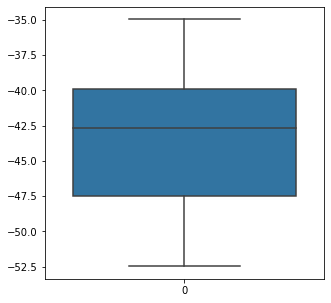

In [26]:
model = MLPRegressor(alpha=0.01, batch_size=10, hidden_layer_sizes=14, max_iter=600,
             solver='lbfgs')

cv_results = cross_val_score(model, Xt, Y, cv=cv, n_jobs=-1, scoring='neg_mean_absolute_error')

f = plt.figure(figsize=(5,5))
sns.boxplot(data=cv_results)

print("%03s: %f (+/- %f)" % ("XGB", cv_results.mean(), cv_results.std()))

In [29]:
# training set performance 

y_predtrain = MLP.predict(X_train)

# Metrics 
r2 = r2_score(y_train,y_predtrain)
MAE = mean_absolute_error(y_train,y_predtrain)
MSE = mean_squared_error(y_train,y_predtrain)

print(f"r2 equals {r2} \n MAE equals {MAE} \n MSE equals {MSE}")

r2 equals 0.5539285158848971 
 MAE equals 42.5925406175975 
 MSE equals 2734.7293941383296


MLP does not to overfit the data, however the results are moderate. In conclusion with hypeparameter tuning we improve our results.  

##### Remarks 

Hyperparameter tuning enhance slightly both the MLP and XGBoost model, however the results on test set are moderate. XGB overfits the data and even though we tried regularization (through pruning) we could not improve the results. 

In conclusion, the winner model after hyperparameter tuning is MLP.